## Linear Regression for Diabetes Dataset

### Import Libraries

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pymc3 as pm
%matplotlib inline

/Users/konoharuki/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Download Dataset

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
X = diabetes.data

In [4]:
y = diabetes.target

In [5]:
# Number of Feature Vectors
ndim = X.shape[1]

In [6]:
ndim

10

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Make Model

In [8]:
model = pm.Model()

In [9]:
with model:
    
    alpha = pm.Normal("alpha", mu=0, sd=100)
    beta_0 = pm.Normal("beta_0", mu=0, sd=100)
    beta_1 = pm.Normal("beta_1", mu=0, sd=100)
    beta_2 = pm.Normal("beta_2", mu=0, sd=100)
    beta_3 = pm.Normal("beta_3", mu=0, sd=100)
    beta_4 = pm.Normal("beta_4", mu=0, sd=100)
    beta_5 = pm.Normal("beta_5", mu=0, sd=100)
    beta_6 = pm.Normal("beta_6", mu=0, sd=100)
    beta_7 = pm.Normal("beta_7", mu=0, sd=100)
    beta_8 = pm.Normal("beta_8", mu=0, sd=100)
    beta_9 = pm.Normal("beta_9", mu=0, sd=100)
    
    sigma = pm.HalfNormal("sigma", sd=1)
    
    mu = alpha \
            + X_train[:, 0] * beta_0 \
            + X_train[:, 1] * beta_1 \
            + X_train[:, 2] * beta_2 \
            + X_train[:, 3] * beta_3 \
            + X_train[:, 4] * beta_4 \
            + X_train[:, 5] * beta_5 \
            + X_train[:, 6] * beta_6 \
            + X_train[:, 7] * beta_7 \
            + X_train[:, 8] * beta_8 \
            + X_train[:, 9] * beta_9 \
    
    y_obs = pm.Normal("y_obs", mu=mu, sd=sigma, observed=y_train)

### Sampling

In [10]:
with model:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/konoharuki/anaconda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, beta_9, beta_8, beta_7, beta_6, beta_5, beta_4, beta_3, beta_2, beta_1, beta_0, alpha]
100%|██████████| 10500/10500 [01:39<00:00, 105.68it/s]
The acceptance probability does not match the target. It is 0.9012484823252789, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8796582729305965, but should be close to 0.8. Try to increase the number of tuning steps.


### Result

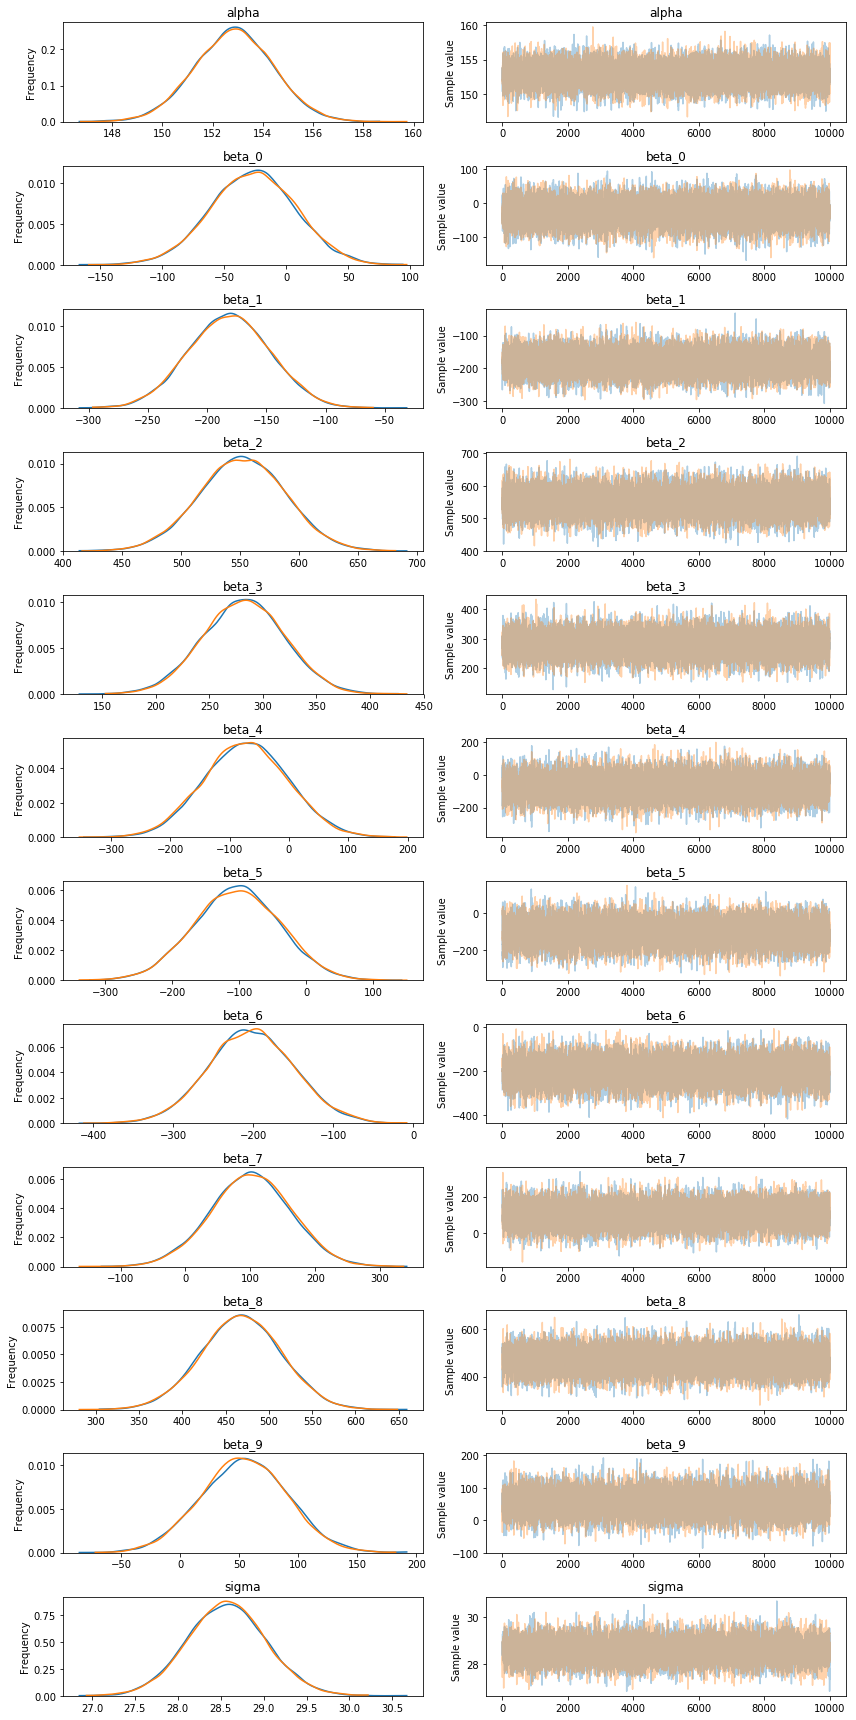

In [11]:
_ = pm.traceplot(trace)

In [12]:
summary = pm.summary(trace)

In [13]:
summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,152.855665,1.554338,0.009816,149.672993,155.777390,20000.0,0.999994
beta_0,-27.027402,34.194435,0.206251,-94.766955,39.597261,20000.0,0.999954
beta_1,-181.795262,34.230371,0.199907,-247.648341,-114.660772,20000.0,0.999972
beta_2,551.731011,36.561336,0.206312,478.968073,622.658584,20000.0,0.999966
beta_3,281.998207,38.140567,0.218434,206.388399,354.790488,20000.0,0.999950
beta_4,-72.843712,70.682106,0.520290,-209.032103,65.227025,16513.0,0.999984
beta_5,-104.489744,63.845603,0.481802,-227.115154,20.517780,17489.0,0.999961
beta_6,-203.614065,53.754136,0.370290,-311.748648,-99.911965,20000.0,0.999960
beta_7,100.573876,61.444818,0.372935,-23.152972,217.838897,20000.0,0.999991
beta_8,467.773659,46.221339,0.278407,376.349916,556.534581,20000.0,1.000030


In [14]:
y_train_pred = summary["mean"][0] + np.dot(X_train, summary["mean"][1:-1].values)
y_test_pred = summary["mean"][0] + np.dot(X_test, summary["mean"][1:-1].values)

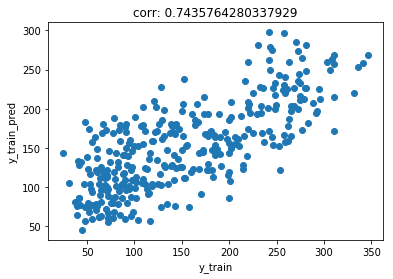

In [15]:
plt.scatter(y_train, y_train_pred)
plt.title("corr: {}".format(np.corrcoef(y_train, y_train_pred)[1, 0]))
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

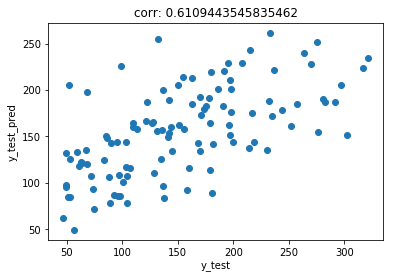

In [16]:
plt.scatter(y_test, y_test_pred)
plt.title("corr: {}".format(np.corrcoef(y_test, y_test_pred)[1, 0]))
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()